In [3]:
import mne

In [4]:
mne.io.read_raw_fif("data/data_rr_filt-raw.fif")

Opening raw data file data/data_rr_filt-raw.fif...
    Range : 3500 ... 471000 =      7.000 ...   942.000 secs
Ready.


Measurement date,"March 01, 2020 06:31:33 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,43 points
Good channels,40 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.90 Hz
Lowpass,40.00 Hz


In [5]:
data = mne.read_epochs("data/epochs_filt_rr-epo.fif")

Reading /Users/ttpo100ajiex/Desktop/HSE/CourseProject/data/epochs_filt_rr-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1046 matching events found
No baseline correction applied
0 projection items activated


In [6]:
import pandas
data.get_data().shape

/var/folders/qc/648rvfv12j11rcky4l5xgp7r0000gn/T/ipykernel_35561/1037322491.py:2: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data.get_data().shape


(1046, 40, 501)

In [7]:
len(data.ch_names)

40

No projector specified for this dataset. Please consider the method self.add_proj.


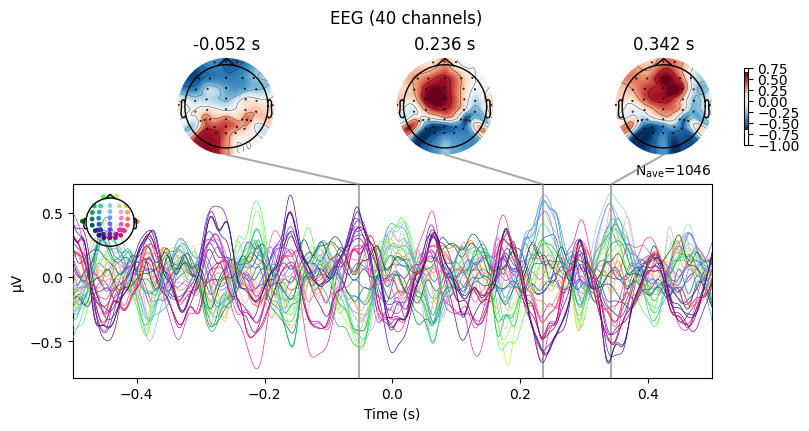

(40, 501)


In [8]:
data.average().plot_joint()
print(data.average().get_data().shape)

In [9]:
import gtda
import gtda.time_series
# Build attractor
embedding_dimension = 3
embedding_time_delay = 8
stride = 3 # downsampling

attractor = gtda.time_series.TakensEmbedding(
#    n_jobs=2,
    time_delay=embedding_time_delay,
    dimension=embedding_dimension,
    stride=stride,
)
res = attractor.fit_transform(data.get_data())
res.shape

/var/folders/qc/648rvfv12j11rcky4l5xgp7r0000gn/T/ipykernel_35561/3335082287.py:14: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  res = attractor.fit_transform(data.get_data())


(1046, 162, 120)

In [10]:
import numpy
x = numpy.arange(8).reshape(2, 1, 4)
X = numpy.concatenate([x, -x], axis=1)
print(X.shape)

(2, 2, 4)


In [11]:
TE = gtda.time_series.TakensEmbedding(time_delay=1, dimension=2, flatten=True)
print(TE.fit_transform(X).shape)

(2, 3, 4)


In [12]:
TE = gtda.time_series.TakensEmbedding(time_delay=1, dimension=2, flatten=False)
print(TE.fit_transform(X).shape)

(2, 2, 3, 2)


In [3]:
import pandas
import os
data = pandas.read_feather('materials/Features/m10/df_ft_psd_loc_db.feather')
data.shape

(1046, 75)